In [92]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [93]:
import pandas as pd

train_df = pd.read_csv("/content/Titanic_train.csv")
test_df = pd.read_csv("/content/Titanic_train.csv")


In [94]:
print(train_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


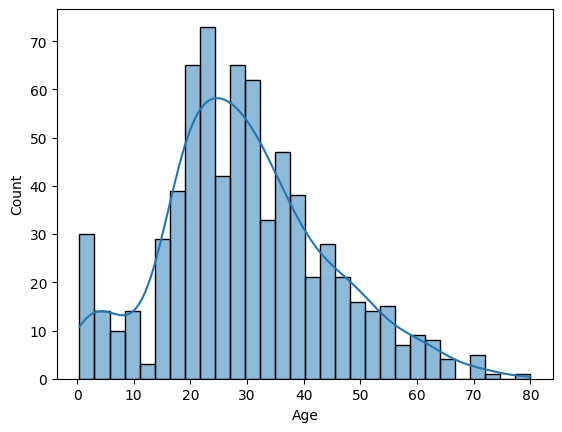

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df['Age'], bins=30, kde=True)
plt.show()


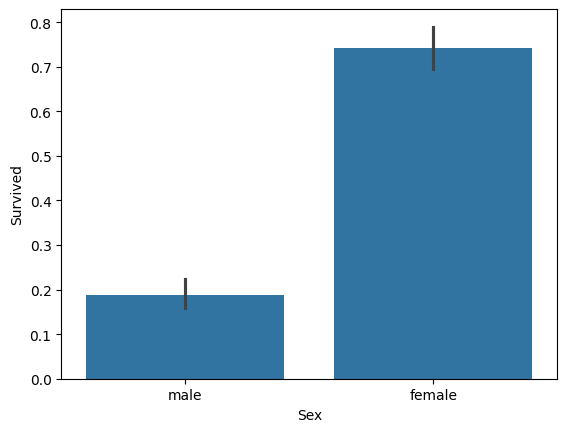

In [96]:
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.show()


In [98]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


<ipython-input-98-9ae770744f95>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-98-9ae770744f95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [99]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)


In [100]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [102]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8212290502793296


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [103]:
from sklearn.metrics import classification_report

print("LightGBM Report:\n", classification_report(y_test, y_pred_lgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


LightGBM Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



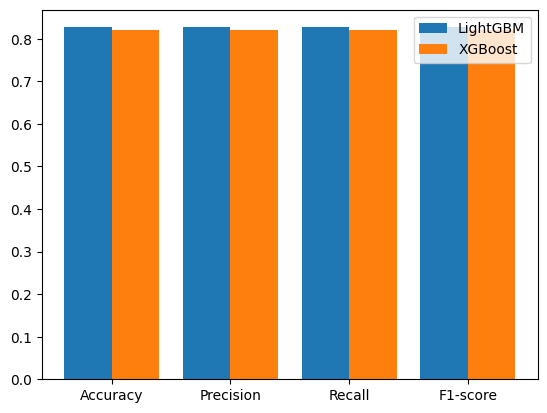

In [104]:
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores_lgb = [accuracy_score(y_test, y_pred_lgb)]
scores_xgb = [accuracy_score(y_test, y_pred_xgb)]

x = np.arange(len(metrics))
plt.bar(x - 0.2, scores_lgb, 0.4, label='LightGBM')
plt.bar(x + 0.2, scores_xgb, 0.4, label='XGBoost')
plt.xticks(x, metrics)
plt.legend()
plt.show()
